<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/%5B3%5D%EC%BB%A4%ED%94%BC%EC%A0%84%EB%AC%B8%EC%A0%90_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D_%EC%A2%8C%ED%91%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 위경도 좌표만 사용하여 커피전문점의 매출을 예측하여 봅시디

## 1. 데이터를 불러오자

In [0]:
#copy.right Hongjai Rhee

## 필요한 라이브러리 불러오기
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals; import pathlib; import seaborn as sns 
from keras.models import Sequential; from keras.layers import Dense, Dropout, Activation; import pandas as pd;  import numpy as np
from sklearn.model_selection import train_test_split; from keras.utils.np_utils import to_categorical; from matplotlib import style
!git clone https://github.com/hongjai-rhee/public.git
## 깃허브 디렉토리 마운트


Using TensorFlow backend.


Cloning into 'public'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 238 (delta 25), reused 29 (delta 11), pack-reused 178
Receiving objects: 100% (238/238), 8.45 MiB | 15.82 MiB/s, done.
Resolving deltas: 100% (103/103), done.


In [0]:
## 데이터 불러오기  

dat = pd.read_csv('/content/public/coffee_seoul_pred_0.csv', encoding='cp949')
print(dat.head(10))    
#  lon=경도,  lat=위도,   sales =월매출액(만원)
dat = np.array(dat); ncol=dat.shape[1]; nrow=dat.shape[0]
x=dat[:,0:ncol-1]; y=np.log(dat[:,-1]); ## 월매출은 로그 스케일로 변환


          lon        lat   sales
0  127.063878  37.510038  4800.0
1  127.020635  37.516184  4416.0
2  127.057100  37.512939  3888.0
3  127.055213  37.496615  4032.0
4  127.051440  37.518688  4800.0
5  127.041240  37.516605  5376.0
6  127.033000  37.494129  5568.0
7  127.061904  37.493344  5184.0
8  127.052705  37.513472  5568.0
9  127.101842  37.488013  5184.0


# 네트워크 구조와 학습횟수를 정하자

In [0]:
## 학습 파라미터 설정
hidden_neuron=4      ## 은닉층(1개)의 뉴론 수 (은닉층 없으면 0으로 설정)
EPOCH=500; BATCH=32  ## 학습횟수 

# 학습을 실행한다








Train on 1189 samples, validate on 298 samples
Epoch 1/500





 - 1s - loss: 11446.5672 - mean_squared_error: 11446.5672 - val_loss: 9993.7114 - val_mean_squared_error: 9993.7114
Epoch 2/500
 - 0s - loss: 8889.9312 - mean_squared_error: 8889.9312 - val_loss: 7797.0340 - val_mean_squared_error: 7797.0340
Epoch 3/500
 - 0s - loss: 6973.3692 - mean_squared_error: 6973.3692 - val_loss: 6156.4732 - val_mean_squared_error: 6156.4732
Epoch 4/500
 - 0s - loss: 5532.3479 - mean_squared_error: 5532.3479 - val_loss: 4910.7140 - val_mean_squared_error: 4910.7140
Epoch 5/500
 - 0s - loss: 4430.9547 - mean_squared_error: 4430.9547 - val_loss: 3951.6487 - val_mean_squared_error: 3951.6487
Epoch 6/500
 - 0s - loss: 3578.2224 - mean_squared_error: 3578.2224 - val_loss: 3204.2440 - val_mean_squared_error: 3204.2440
Epoch 7/500
 - 0s - loss: 2909.8586 - mean_squared_error: 2909.8586 - val_loss: 2613.9599 - val_mean_squared_error: 2613.9599
Epoch 8/500
 - 0s - loss: 2378.8444 - mean_squared_error:

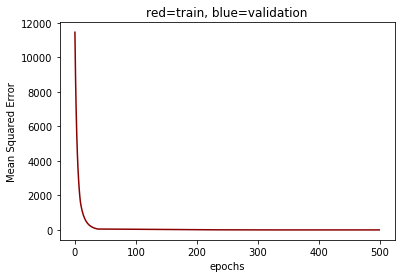

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


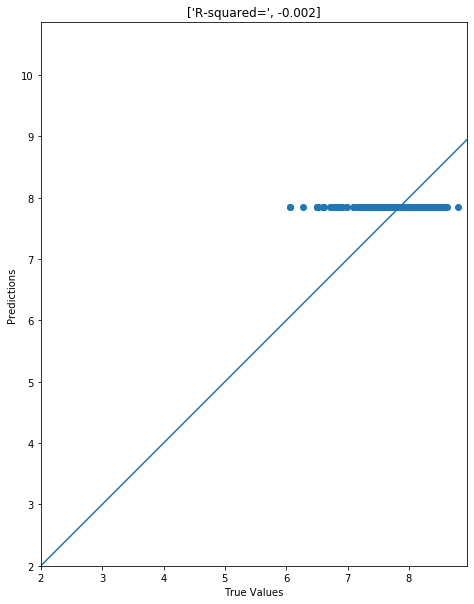

In [0]:

#### 이 아래는 자동으로 실행됨

## 2. 학습/검증 데이터 나누기  (80-20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=77)

## 3. 모델만들기
if hidden_neuron ==0: 
    model = Sequential()
    model.add(Dense(1, input_dim=x_train.shape[1]))   ## 은닉층=0
else: 
    model = Sequential()
    model.add(Dense(hidden_neuron, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(1)) ## 은닉층=1

model.compile(loss='mse', optimizer='adam', metrics=['mse'])
hist = model.fit(x_train, y_train, epochs = EPOCH, batch_size=BATCH, validation_data=(x_test, y_test), verbose = 2)
model.summary()
from sklearn.metrics import r2_score; import matplotlib.pyplot as plt


# model fit 그림으로 표시
plt.plot(range(EPOCH), hist.history['mean_squared_error'], label='Training Mean Squared Error', color='darkred')
#plt.plot(range(EPOCH), hist.history['val_mean_squared_error'], label='Validation Mean Squared Error', color='darkblue')
plt.xlabel('epochs'); plt.ylabel('Mean Squared Error'); plt.title('red=train, blue=validation'); plt.show()
model.summary()

pred_y = model.predict(x_test)
r2=r2_score(y_test, pred_y)

## 테스트 셋에 대한 예측결과 시각화
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred_y);plt.xlabel('True Values');plt.ylabel('Predictions');plt.axis('equal');plt.axis('square'); plt.title(["R-squared=", np.round(r2,3)])
plt.xlim([2,plt.xlim()[1]]);plt.ylim([2,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()



**45도 선에 위치할수록 테스트셋에 대한 예측이 정확하게 된 것이**다
예측치는 거의 동일하게 나타나고 있다.


# 개점 예정인 새로운 커피전문점에 대한 월매출액을 예측하여 보자


In [0]:
# 6. 예측하기 
x_new= x_test[4:7]; print(np.round(x_new,2)); 
yhat = np.exp(model.predict(x_new))
print(np.round(yhat,2))
## EOF

[[127.16  37.55]
 [126.98  37.57]
 [126.8   37.57]]
[[2550.65]
 [2550.65]
 [2550.65]]



---
# 생각해보기
위치정보만으로는 매출을 예측하기 어렵다(아무리 복잡한 신경망을 설계하더라도). **Garbage In, Garbage Out!! **어떻게 해야 할까?


---
# 경쟁이 수익성에 영향을 줄 것이다
일정거리 이내의 경쟁업체 수를 구해보자 


In [0]:

## 각 스토어에서 반경 250미터 이내에 있는 경쟁업체의 수를 구해보자
target=250   # 목표 범위설정 (미터)

from sklearn.metrics.pairwise import haversine_distances; from math import radians
loc=x[:,0:2]
dist = []; i=0; fr=loc[i]  # 출발점
fr_radians = [radians(_) for _ in fr] # 각도로 변환

for j in range(loc.shape[0]):
    to=loc[j]             # 목적지 
    to_radians = [radians(_) for _ in to]
    result = haversine_distances([fr_radians, to_radians])
    dist.append(result[0,1]* 6371000) ## 위경도의 거리(meter)를 구하는 Haversine 공식 
dist=np.array(dist)    
print(dist)

print(target, "미터 이내 경쟁업체 수 = ", (dist<=target).sum()-1)  ## 거리가 250미터 이내인  개체의 수 (자사 제외) 



[   0.         4826.04894587  778.34603341 ... 7120.90930503 5303.64131156
 5303.64131156]
250 미터 이내 경쟁업체 수 =  7
